# KNN Classifier with GridSearchCV Tuning

# Read the CSV and Perform Basic Data Cleaning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact',
       'koi_duration',
       'koi_depth', 'koi_prad', 
       'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff','koi_slogg',
       'koi_srad', 'ra', 'dec',
       'koi_kepmag']]

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
X = selected_features
y = df['koi_disposition']
print(X.shape, y.shape)

(6991, 40) (6991,)


In [7]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

# Train the Model

k: 1, Train/Test Score: 1.000/0.790
k: 3, Train/Test Score: 0.897/0.811
k: 5, Train/Test Score: 0.878/0.820
k: 7, Train/Test Score: 0.866/0.823
k: 9, Train/Test Score: 0.856/0.828
k: 11, Train/Test Score: 0.848/0.828
k: 13, Train/Test Score: 0.849/0.822
k: 15, Train/Test Score: 0.841/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 19, Train/Test Score: 0.836/0.824
k: 21, Train/Test Score: 0.839/0.823
k: 23, Train/Test Score: 0.840/0.826
k: 25, Train/Test Score: 0.837/0.824
k: 27, Train/Test Score: 0.836/0.822
k: 29, Train/Test Score: 0.835/0.824


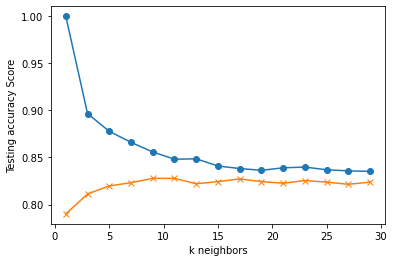

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_minmax, y_train)
print('k=19 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=19 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=19 Train Acc: 0.836
k=19 Test Acc: 0.824


In [11]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [12]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
weight_options = ["uniform", "distance"]
metrics = ['euclidean', 'manhattan', 'minkowski']

param_grid = dict(n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29], weights = weight_options, metric=metrics)

grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy', verbose=3)
grid.fit(X_train_minmax, y_train)

hbors=5, weights=uniform, score=0.811, total=   0.2s
[CV] metric=minkowski, n_neighbors=5, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=5, weights=uniform, score=0.812, total=   0.2s
[CV] metric=minkowski, n_neighbors=5, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=5, weights=uniform, score=0.806, total=   0.2s
[CV] metric=minkowski, n_neighbors=5, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=5, weights=uniform, score=0.812, total=   0.3s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, score=0.827, total=   0.4s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, score=0.806, total=   0.4s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, score=0.810, total=   0.3s
[CV] metric=minkowsk

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [13]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8445515176212897
{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=29, weights='distance')


In [14]:
knn = KNeighborsClassifier(n_neighbors=29, weights='distance', metric='manhattan')
knn.fit(X_train_minmax, y_train)
print('k=29 Train Acc: %.3f' % knn.score(X_train_minmax, y_train))
print('k=29 Test Acc: %.3f' % knn.score(X_test_minmax, y_test))

k=29 Train Acc: 1.000
k=29 Test Acc: 0.841


In [15]:
predictions = grid.predict(X_test_minmax)
predictions

array(['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', ..., 'CONFIRMED',
       'CANDIDATE', 'CONFIRMED'], dtype=object)

In [24]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,CANDIDATE,CANDIDATE
1744,CANDIDATE,CANDIDATE
1745,CONFIRMED,CONFIRMED
1746,CANDIDATE,CONFIRMED


In [25]:
results.head(20)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
5,CONFIRMED,CONFIRMED
6,CONFIRMED,CANDIDATE
7,CANDIDATE,CANDIDATE
8,CANDIDATE,CANDIDATE
9,FALSE POSITIVE,FALSE POSITIVE


In [26]:
results.tail(20)

,Prediction,Actual
1728,CANDIDATE,CONFIRMED
1729,FALSE POSITIVE,FALSE POSITIVE
1730,CANDIDATE,CONFIRMED
1731,CONFIRMED,CANDIDATE
1732,FALSE POSITIVE,FALSE POSITIVE
1733,FALSE POSITIVE,FALSE POSITIVE
1734,FALSE POSITIVE,FALSE POSITIVE
1735,FALSE POSITIVE,FALSE POSITIVE
1736,FALSE POSITIVE,FALSE POSITIVE
1737,FALSE POSITIVE,FALSE POSITIVE


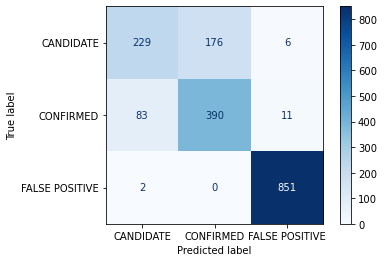

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.73      0.56      0.63       411
     CONFIRMED       0.69      0.81      0.74       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



In [29]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Ezra_Tassone_KNN.sav'
joblib.dump(knn, filename)

['Ezra_Tassone_KNN.sav']